* To investigate the impact of each forcing, i.e., river flow, tides, winds and Coriolis force on the plume properties and stratification.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,stormtools,tidetools,geo_tools,rivertools)
import datetime, os
from glob import glob
import pandas as pd
from IPython.core.display import Image,display
import matplotlib.pyplot as plt
import pytz 
import wind
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

* First, take a look at the conditions of the selected simulations, which are Oct 2014 and May 2015, respectively.

# River flow at Hope

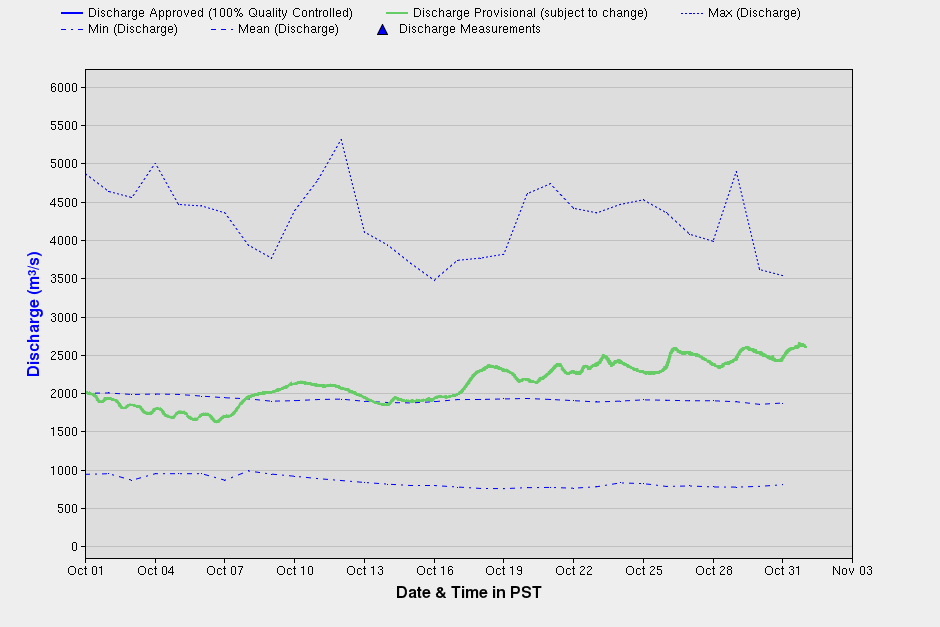

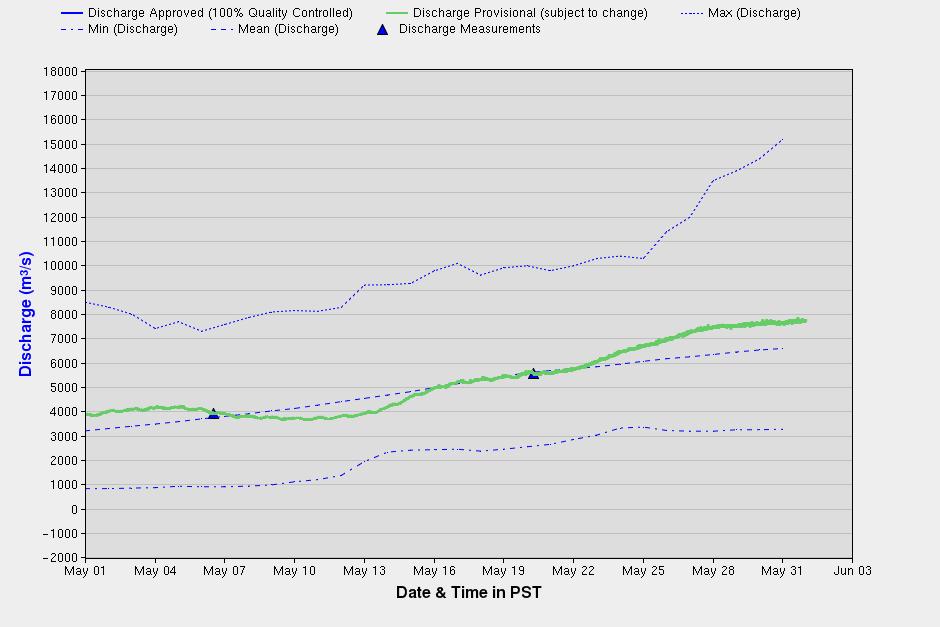

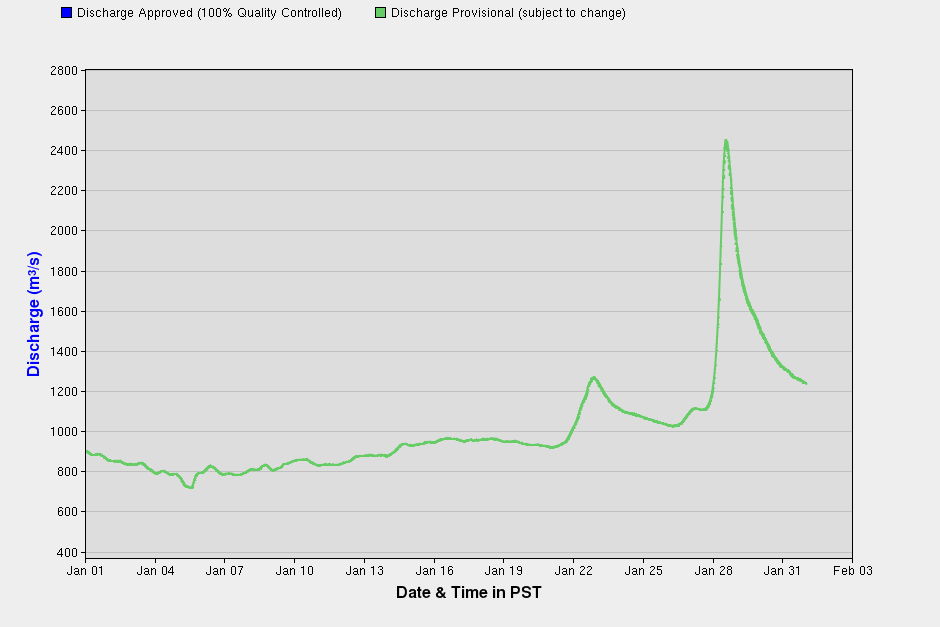

In [3]:
x = Image(filename='/ocean/jieliu/research/meopar/surface current/oct2014.png')
y = Image(filename='/ocean/jieliu/research/meopar/surface current/may2015.png')
z = Image(filename='/ocean/jieliu/research/meopar/surface current/Jan2016Discharge.png')
display(x, y, z)

In [4]:
def Get_River_Discharge(data_path,data_start,e1t,e2t, MONTH = 10):
    RUNOFFS = np.zeros(31)
    string = 1
    for t in np.arange(1,32): ## default tst -0, from start
        if string <10:
            real = nc.Dataset(data_path+str(data_start)+str(string)+'.nc')
            #print(data_path+str(data_start)+str(string),t)
        elif string >=10:
            real = nc.Dataset(data_path+str(string)+'.nc')
            #print(data_path+str(string),t)
        RUNOFFS[t-1] = real.variables['rorunoff'][0,500,395]*e1t[0,500,395]*e2t[0,500,395]/1000     
        string = string +1
    return RUNOFFS

In [5]:
def Get_River_Discharge(data_path,data_start,e1t,e2t, MONTH = 10):
    RUNOFFS = np.zeros(31)
    string = 1
    for t in np.arange(1,32): ## default tst -0, from start
        if string <10:
            real = nc.Dataset(data_path+str(data_start)+str(string)+'.nc')
            #print(data_path+str(data_start)+str(string),t)
        elif string >=10 and string <=31:
            if MONTH !=6:
                real = nc.Dataset(data_path+str(string)+'.nc')
            elif MONTH ==6 and string ==31: ##June no 31st date
                real = nc.Dataset(data_path+str(string-1)+'.nc')
            else:
                real = nc.Dataset(data_path+str(string)+'.nc')
            #print(data_path+str(string),t)
        RUNOFFS[t-1] = real.variables['rorunoff'][0,500,395]*e1t[0,500,395]*e2t[0,500,395]/1000     
        string = string +1
    return RUNOFFS

In [6]:
e1t,e2t = rivertools.get_bathy_cell_size(grid='/ocean/jieliu/research/meopar/nemo-forcing/grid/'
         'coordinates_seagrid_SalishSea.nc')

In [7]:
data_path = '/data/jieliu/MEOPAR/river-treatment/NewRFraserCElse_y2014m10d'
data_start = 0
RUNOFFS = Get_River_Discharge(data_path,data_start,e1t,e2t,MONTH =10)

In [8]:
data_path = '/data/jieliu/MEOPAR/river-treatment/NewRFraserCElse_y2015m05d'
data_start = 0
RUNOFFS_may = Get_River_Discharge(data_path,data_start,e1t,e2t, MONTH =5)

In [9]:
data_path = '/data/jieliu/MEOPAR/river-treatment/NewRFraserCElse_y2016m01d'
data_start = 0
RUNOFFS_jan = Get_River_Discharge(data_path,data_start,e1t,e2t, MONTH= 1)

In [10]:
data_path = '/data/jieliu/MEOPAR/river-treatment/NewRFraserCElse_y2015m06d'
data_start = 0
RUNOFFS_june = Get_River_Discharge(data_path,data_start,e1t,e2t, MONTH= 6)

# Tides at PA

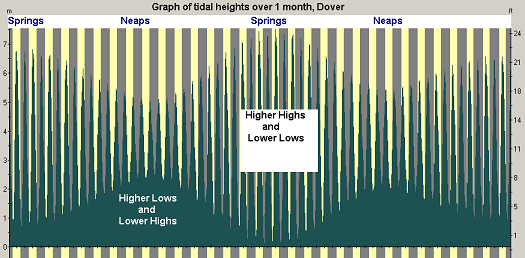

In [11]:
Image(filename='/ocean/jieliu/research/meopar/surface current/tideneapsspringgraph.PNG')

In [4]:
## load t_tide
tfile = '/ocean/jieliu/research/meopar/tools/SalishSeaNowcast/tidal_predictions/\
Point Atkinson_t_tide_compare8_31-Dec-2013_02-Dec-2015.csv'
ttide, msl = stormtools.load_tidal_predictions(tfile)

In [5]:
def find_ind_tide(run_low, run_up, run_label1,run_label2):
    """To find index of ttide within a time range"""
    run_low = run_low.replace(tzinfo=pytz.utc) ## convert model datetime to tzinfo=<UTC>
    run_up = run_up.replace(tzinfo=pytz.utc) ## the time i want to label on the plot
    run_label1 = run_label1.replace(tzinfo=pytz.utc)
    run_label2 = run_label2.replace(tzinfo=pytz.utc)
    ttide_dt  = ttide.time.dt.to_pydatetime() ## convert ttide.time (pandas) to datetime
    for i in range(len(ttide_dt)):
        if ttide_dt[i]== run_low:
            low_ind = i
        if ttide_dt[i]== run_up:
            up_ind = i  
        if ttide_dt[i]== run_label1:
            lab_ind1 = i  
        if ttide_dt[i]== run_label2:
            lab_ind2 = i  
    return low_ind, up_ind, lab_ind1,lab_ind2

In [6]:
run_low = datetime.datetime(2014,9,1)
run_up = datetime.datetime(2014,11,1)
run_label1 = datetime.datetime(2014,9,24)
run_label2 = datetime.datetime(2014,10,1)
low_ind,up_ind,lab_ind1,lab_ind2 = find_ind_tide(run_low,run_up,run_label1,run_label2)

(-3.5, 3.5)

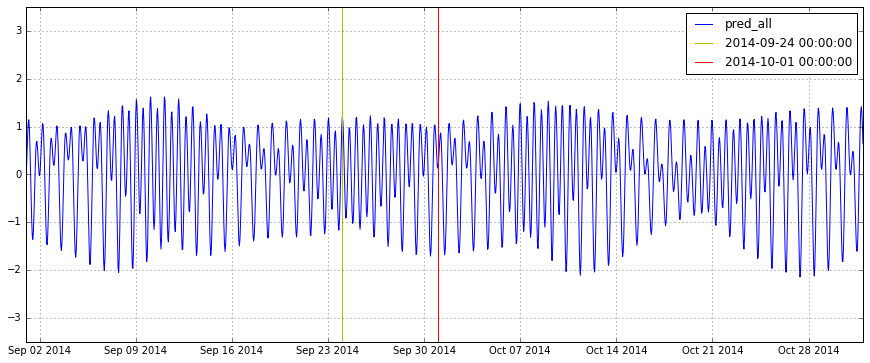

In [7]:
fig, ax = plt.subplots(1,1,figsize = (15,6))
ax.plot(ttide.time[low_ind:up_ind], ttide.pred_all[low_ind:up_ind])
ax.plot([ttide.time[lab_ind1],ttide.time[lab_ind1]],[-3.5,3.5],'y-',label = run_label1)
ax.plot([ttide.time[lab_ind2],ttide.time[lab_ind2]],[-3.5,3.5],'r-',label = run_label2)
ax.grid('on')
ax.legend()
ax.set_ylim(-3.5,3.5)

* spin-up period is in Springs, but Spring-Neap cycle is not very significant in fall.

(-3.5, 3.5)

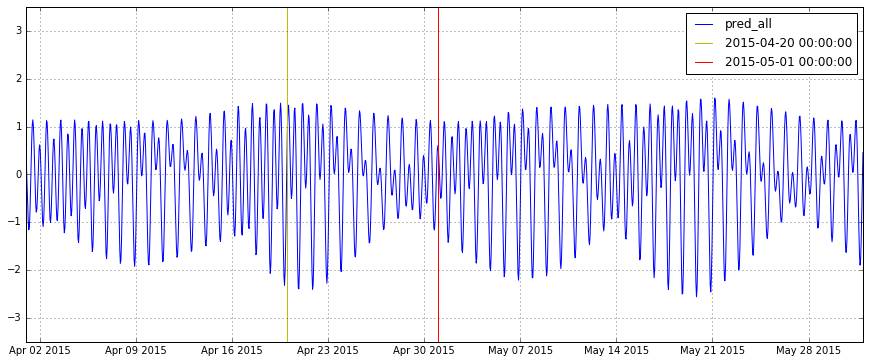

In [8]:
run_low = datetime.datetime(2015,4,1)
run_up = datetime.datetime(2015,6,1)
run_label1 = datetime.datetime(2015,4,20)
run_label2 = datetime.datetime(2015,5,1)
low_ind,up_ind,lab_ind1,lab_ind2 = find_ind_tide(run_low,run_up,run_label1,run_label2)
fig, ax = plt.subplots(1,1,figsize = (15,6))
ax.plot(ttide.time[low_ind:up_ind], ttide.pred_all[low_ind:up_ind])
ax.plot([ttide.time[lab_ind1],ttide.time[lab_ind1]],[-3.5,3.5],'y-',label = run_label1)
ax.plot([ttide.time[lab_ind2],ttide.time[lab_ind2]],[-3.5,3.5],'r-',label = run_label2)
ax.grid('on')
ax.legend()
ax.set_ylim(-3.5,3.5)

* spin-up period cross Spring-Neap tidal modulation period.

* ttide doesn't include days after Dec, 2015. Use modelled ssh at PA instead.

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-3.5, 3.5)

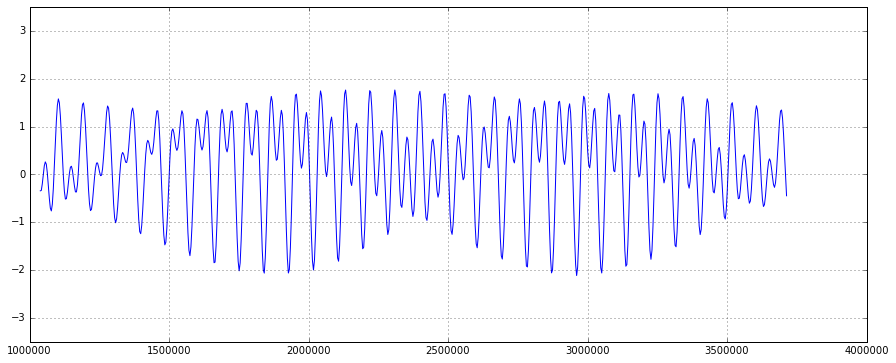

In [17]:
grid_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')
ssh = grid_T.variables['sossheig']
timesteps = grid_T.variables['time_counter'][:]
fig, ax = plt.subplots(1,1,figsize = (15,6))
ax.plot(timesteps,ssh[:,86,89],'-b')
ax.grid('on')
ax.legend()
ax.set_ylim(-3.5,3.5)

# Winds at Sand Heads

In [3]:
OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

In [4]:
def get_winds(start, end, start2, end2, stations,stationsOP,OPlon,OPlat,filesOP,duration,key1,key2,sax,eax,day,hour,minute):
    #compare wind speed and direction for data indicated by key1 and key2
    #time limits on axis given by sax,eax, label the duration range of 
    #drifter and particle floats.
    ## obs
    wind_speed = {}; wind_dir = {}; time = {}; lat={}; lon={}; press={}; temp={}; therm={};
    solar={}; precip={}; qair={}

    #start = '1-Oct-2014'; end = '1-Oct-2014';
    #start2 = '31-Oct-2014'; end2 = '31-Oct-2014';

    #stations = ['Sandheads']

    for key in stations:
        [wind_speed[key],wind_dir[key],temp[key],time[key], 
         lat[key], lon[key]] = stormtools.get_EC_observations(key,start,end)
        [ws,wd,T,t, la, lo] = stormtools.get_EC_observations(key,start2,end2)
        wind_speed[key]=np.append(wind_speed[key],ws)
        wind_dir[key]=np.append(wind_dir[key],wd)
        time[key]=np.append(time[key],t)
        temp[key]=np.append(temp[key],T)

    for (obs, modOP) in zip(stations,stationsOP):    
        [j,i]=wind.find_model_point(lon[obs],lat[obs],OPlon,OPlat)
        lon[modOP] = OPlon[j,i]
        lat[modOP]=OPlat[j,i]

        [wind_speed[modOP],wind_dir[modOP],time[modOP],
         press[modOP],temp[modOP],solar[modOP],
         therm[modOP],qair[modOP],precip[modOP]] = wind.compile_OP(filesOP,j,i)    
    return wind_speed,time

In [16]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '27-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')
sp,ti =get_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

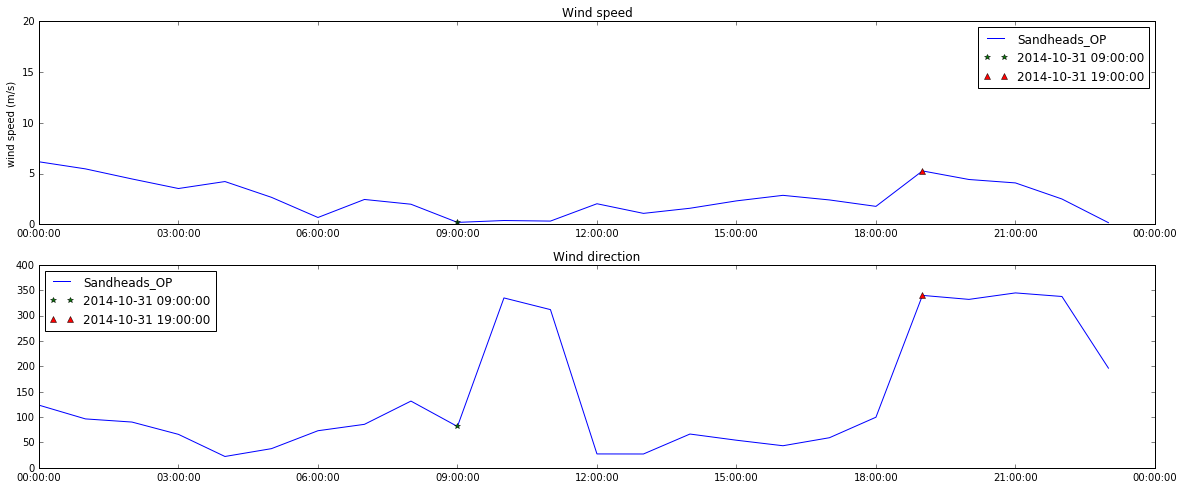

In [5]:
t1= datetime.datetime(2014,10,31,9)
t2= datetime.datetime(2014,10,31,19)
time =wind.compare_winds_label(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       t1,t2,27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

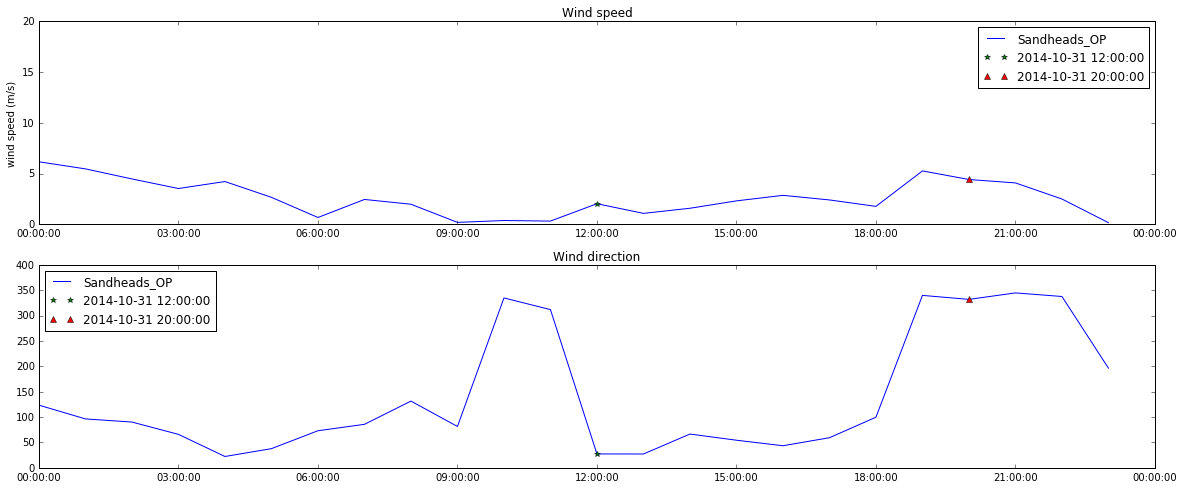

In [4]:
t1= datetime.datetime(2014,10,31,12)
t2= datetime.datetime(2014,10,31,20)
time =wind.compare_winds_label(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       t1,t2,27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

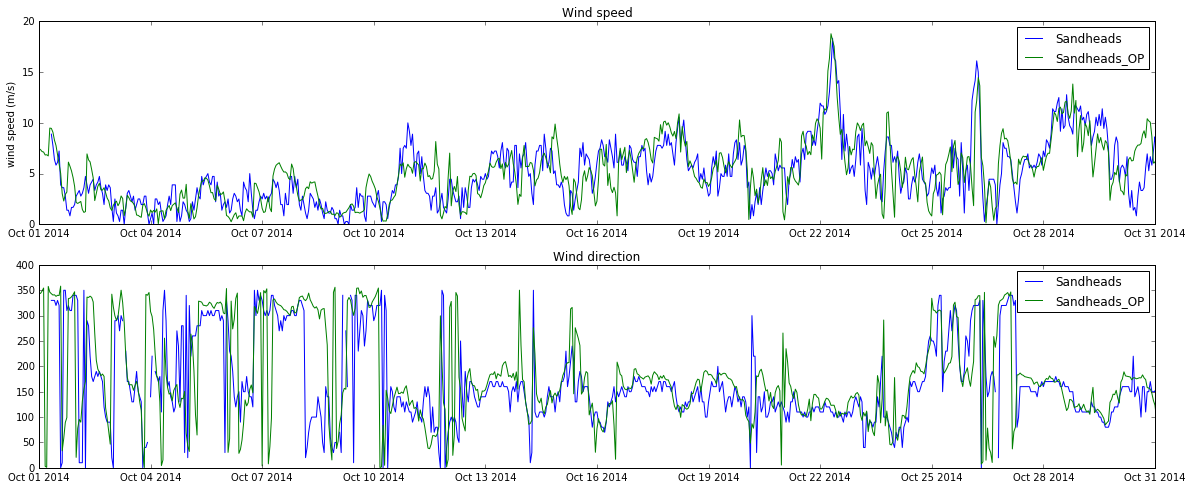

In [5]:
import glob
## OCT 2014
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

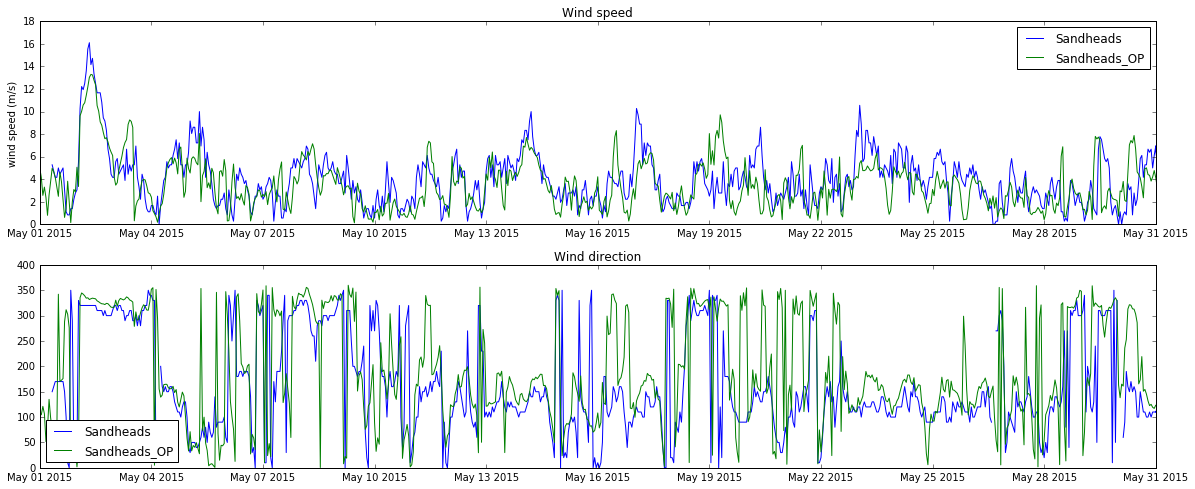

In [12]:
## MAY 2015
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m05d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-May-2015'; end = '31-May-2015';
start2 = '31-May-2015'; end2 = '31-May-2015';
endd = '31-May-2015';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

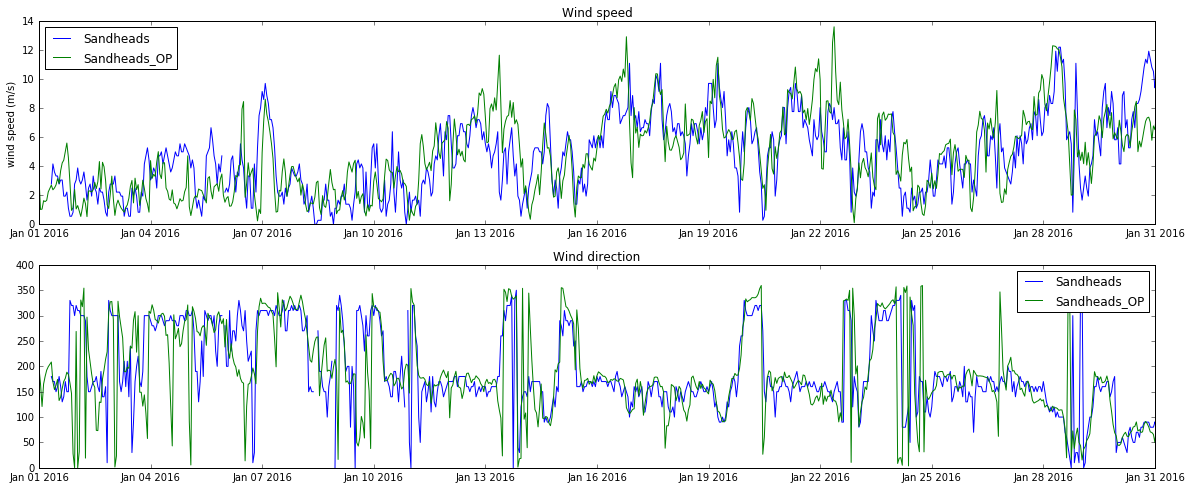

In [5]:
## JAN 2016
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2016m01d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Jan-2016'; end = '31-Jan-2016';
start2 = '31-Jan-2016'; end2 = '31-Jan-2016';
endd = '31-Jan-2016';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [12]:
def get_OPwinds(stationsOP,OPlon,OPlat,filesOP,j,i,duration,sax,eax):
    "This function was made to get model winds' speed and direction"
    wind_speed = {}; wind_dir = {}; time = {}; lat={}; lon={}; press={}; temp={}; therm={};
    solar={}; precip={}; qair={}; lon = {};lat = {};

    for  modOP in stationsOP:   
        
        [j,i]=wind.find_model_point(X[j,i],Y[j,i],OPlon,OPlat)
        lon[modOP] = OPlon[j,i]
        lat[modOP]=OPlat[j,i]
        print(j,i,lon[modOP],lat[modOP])

        [wind_speed[modOP],wind_dir[modOP],time[modOP],
         press[modOP],temp[modOP],solar[modOP],
         therm[modOP],qair[modOP],precip[modOP]] = wind.compile_OP(filesOP,j,i)    
      
    return wind_speed, wind_dir

In [13]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)

OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

#wind_speed,wind_dir =wind.get_OPwinds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       #27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)
wind_speed,wind_dir =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                            27,sax,eax)

135 151 -123.302707487 49.0907848354


In [14]:
## convert direction Oct
wind_dir_correct = []
for dire in wind_dir['Sandheads_OP']:
    dire_corre =  450 - dire
    wind_dir_correct.append(dire_corre)
## load into a pandas frame
df_oct = pd.DataFrame({"speed": wind_speed['Sandheads_OP'], "direction": wind_dir_correct})

In [15]:
u_oct = np.zeros([1,len(df_oct)])
v_oct = np.zeros([1,len(df_oct)])
for i in np.arange(len(df_oct)):
    u_oct[0,i] = df_oct.speed[i] * np.cos((450-df_oct.direction[i])*np.pi/180)
    v_oct[0,i] = df_oct.speed[i] * np.sin((450-df_oct.direction[i])*np.pi/180)

In [16]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m05d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-May-2015'; end = '31-May-2015';
start2 = '31-May-2015'; end2 = '31-May-2015';
endd = '31-May-2015';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speedMay,wind_dirMay =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                       27,sax,eax)

135 151 -123.302707487 49.0907848354


In [17]:
## May
wind_dir_correctMay = []
for dire in wind_dirMay['Sandheads_OP']:
    dire_corre = 450 - dire
    wind_dir_correctMay.append(dire_corre)
df_may = pd.DataFrame({"speed": wind_speedMay['Sandheads_OP'], "direction": wind_dir_correctMay})

In [18]:
u_may = np.zeros([1,len(df_may)])
v_may = np.zeros([1,len(df_may)])
for i in np.arange(len(df_oct)):
    u_may[0,i] = df_may.speed[i] * np.cos((450-df_may.direction[i])*np.pi/180)
    v_may[0,i] = df_may.speed[i] * np.sin((450-df_may.direction[i])*np.pi/180)

In [19]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2016m01d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Jan-2016'; end = '31-Jan-2016';
start2 = '31-Jan-2016'; end2 = '31-Jan-2016';
endd = '31-Jan-2016';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speedJan,wind_dirJan =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                       27,sax,eax)

135 151 -123.302707487 49.0907848354


In [20]:
## Jan
wind_dir_correctJan = []
for dire in wind_dirJan['Sandheads_OP']:
    dire_corre =  450 - dire 
    wind_dir_correctJan.append(dire_corre)
df_jan = pd.DataFrame({"speed": wind_speedJan['Sandheads_OP'], "direction": wind_dir_correctJan})

In [21]:
u_jan = np.zeros([1,len(df_jan)])
v_jan = np.zeros([1,len(df_jan)])
for i in np.arange(len(df_jan)):
    u_jan[0,i] = df_jan.speed[i] * np.cos((450-df_jan.direction[i])*np.pi/180)
    v_jan[0,i] = df_jan.speed[i] * np.sin((450-df_jan.direction[i])*np.pi/180)

In [22]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m06d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Jun-2015'; end = '30-Jun-2015';
start2 = '30-Jun-2015'; end2 = '30-Jun-2015';
endd = '30-Jun-2016';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speedJun,wind_dirJun =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                       27,sax,eax)

135 151 -123.302707487 49.0907848354


In [23]:
## Jun
wind_dir_correctJun = []
for dire in wind_dirJun['Sandheads_OP']:
    dire_corre =  450 - dire 
    wind_dir_correctJun.append(dire_corre)
df_jun = pd.DataFrame({"speed": wind_speedJun['Sandheads_OP'], "direction": wind_dir_correctJun})

In [24]:
u_jun = np.zeros([1,len(df_jun)])
v_jun = np.zeros([1,len(df_jun)])
for i in np.arange(len(df_jun)):
    u_jun[0,i] = df_jun.speed[i] * np.cos((450-df_jun.direction[i])*np.pi/180)
    v_jun[0,i] = df_jun.speed[i] * np.sin((450-df_jun.direction[i])*np.pi/180)

In [25]:
ssh = {}
oct_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
may_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
jan_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

for gridT, string in zip([oct_T,may_T,jan_T], ['oct','may','jan']):
    ssh[string] = gridT.variables['sossheig'][:,86,89]
A = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/24hrs_norles/15jun15/SalishSea_1h_20150615_20150615_grid_T.nc')
B = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NWSmoorerunMoreSubdomain/1hplume06160629smooLargestgridT.nc')
ssh['june'] = np.zeros(360)
ssh['june'][0:24] = A.variables['sossheig'][:,466,329]
ssh['june'][24:] = B.variables['sossheig'][:,117,129]

# Jan

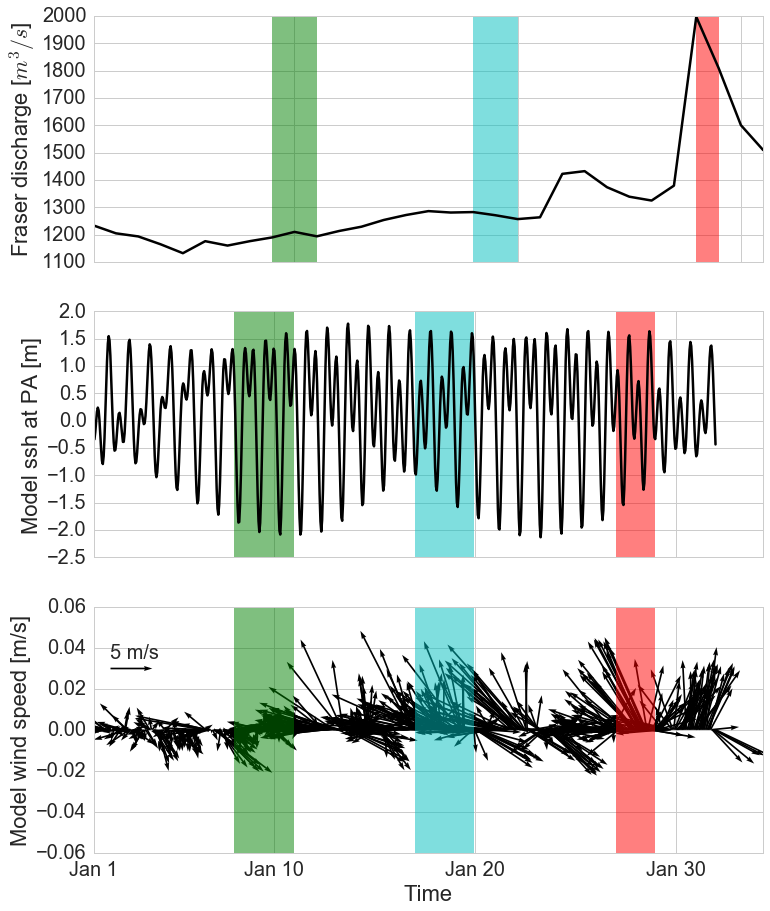

In [26]:
a = [8, 17, 27]; b= [10,19,28]
A = [168,384,624]; B = [239,455,671];
fig, axs = plt.subplots(3,1, figsize = (12,15))
ax = axs[0]
ax.plot(RUNOFFS_jan,color = 'k')
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(a[i], b[i], color=c, alpha=0.5, lw=0)
ax.set_ylabel('Fraser discharge [$m^3/s$]')
ax.set_xticks([0, 9, 19,29])
ax = axs[1]
ax.plot(ssh['jan'],color = 'k')
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(A[i], B[i], color=c, alpha=0.5, lw=0)
ax.set_xticks([0, 9*24, 19*24,29*24])
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Model ssh at PA [m]')
ax =axs[2]
quiver = ax.quiver(u_jan[:],v_jan[:],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')
ax.text(20,0.035,'5 m/s', fontsize = 20)
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(A[i], B[i], color=c, alpha=0.5, lw=0)
ax.set_ylabel('Model wind speed [m/s]')
ax.set_xticks([0, 9*24, 19*24,29*24])
ax.set_xlabel('Time')

for ax in axs:
    if ax != axs[2]:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xticklabels(['Jan 1', 'Jan 10','Jan 20','Jan 30'])

# Oct

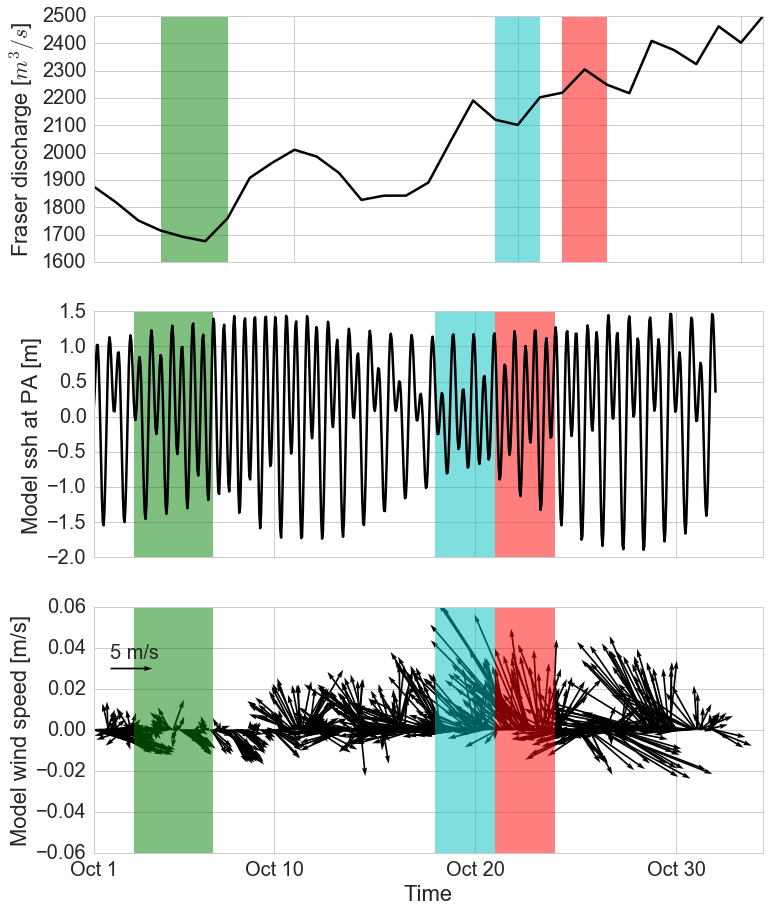

In [30]:
a = [3, 18, 21]; b= [6,20,23]
A = [48,408,480]; B = [143,480,551];
fig, axs = plt.subplots(3,1, figsize = (12,15))
ax = axs[0]
ax.plot(RUNOFFS,color = 'k')
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(a[i], b[i], color=c, alpha=0.5, lw=0)
ax.set_ylabel('Fraser discharge [$m^3/s$]')
ax.set_xticks([0, 9, 19,29])
plt.setp(ax.get_xticklabels(), visible=False)
ax = axs[1]
ax.plot(ssh['oct'],color ='k')
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(A[i], B[i], color=c, alpha=0.5, lw=0)
ax.set_xticks([0, 9*24, 19*24,29*24])
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Model ssh at PA [m]')
ax =axs[2]
quiver = ax.quiver(u_oct[:],v_oct[:],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')
ax.text(20,0.035,'5 m/s', fontsize = 20)
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(A[i], B[i], color=c, alpha=0.5, lw=0)
#plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel('Model wind speed [m/s]')
ax.set_xticks([0, 9*24, 19*24,29*24])
ax.set_xticklabels(['Oct 1', 'Oct 10','Oct 20','Oct 30'])
ax.set_xlabel('Time')

# May

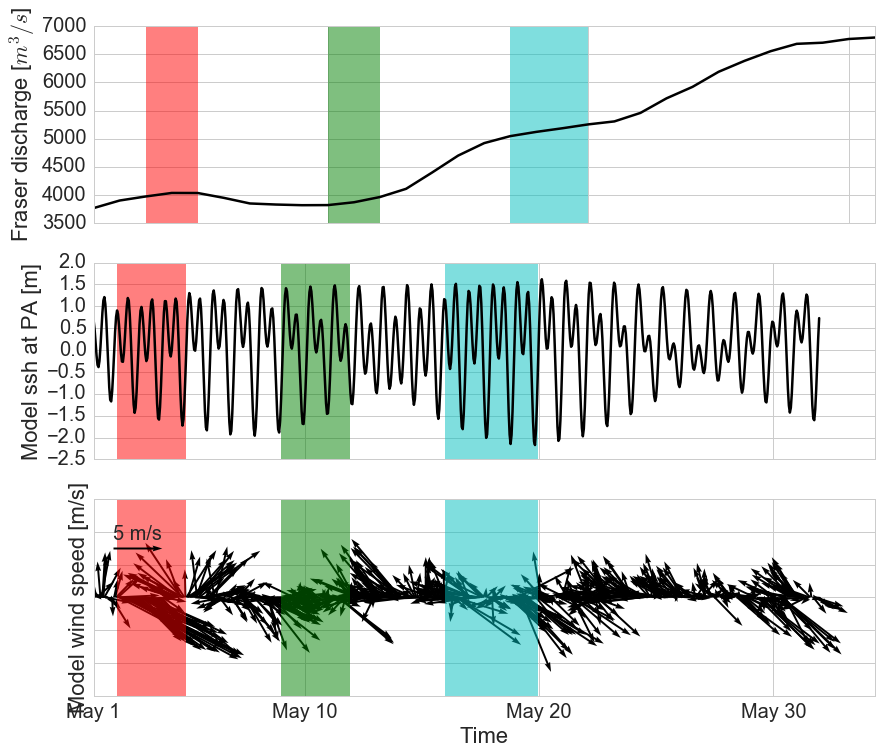

In [28]:
a = [9, 16, 2]; b= [11,19,4]
A = [192,360,24]; B = [263,455,95];
fig, axs = plt.subplots(3,1, figsize = (14,12))
ax = axs[0]
ax.plot(RUNOFFS_may,color = 'k')
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(a[i], b[i], color=c, alpha=0.5, lw=0)
ax.set_ylabel('Fraser discharge [$m^3/s$]')
ax.set_xticks([0, 9, 19,29])
plt.setp(ax.get_xticklabels(), visible=False)
ax = axs[1]
ax.plot(ssh['may'],color = 'k')
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(A[i], B[i], color=c, alpha=0.5, lw=0)
ax.set_xticks([0, 9*24, 19*24,29*24])
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Model ssh at PA [m]')
ax =axs[2]
quiver = ax.quiver(u_may[:],v_may[:],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')
ax.text(20,0.035,'5 m/s', fontsize = 20)
for i, c in zip(np.arange(3),['g','c','r']):
    ax.axvspan(A[i], B[i], color=c, alpha=0.5, lw=0)
ax.set_ylabel('Model wind speed [m/s]')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xticks([0, 9*24, 19*24,29*24])
ax.set_xticklabels(['May 1', 'May 10','May 20','May 30'])
ax.set_xlabel('Time')

# June 15~29

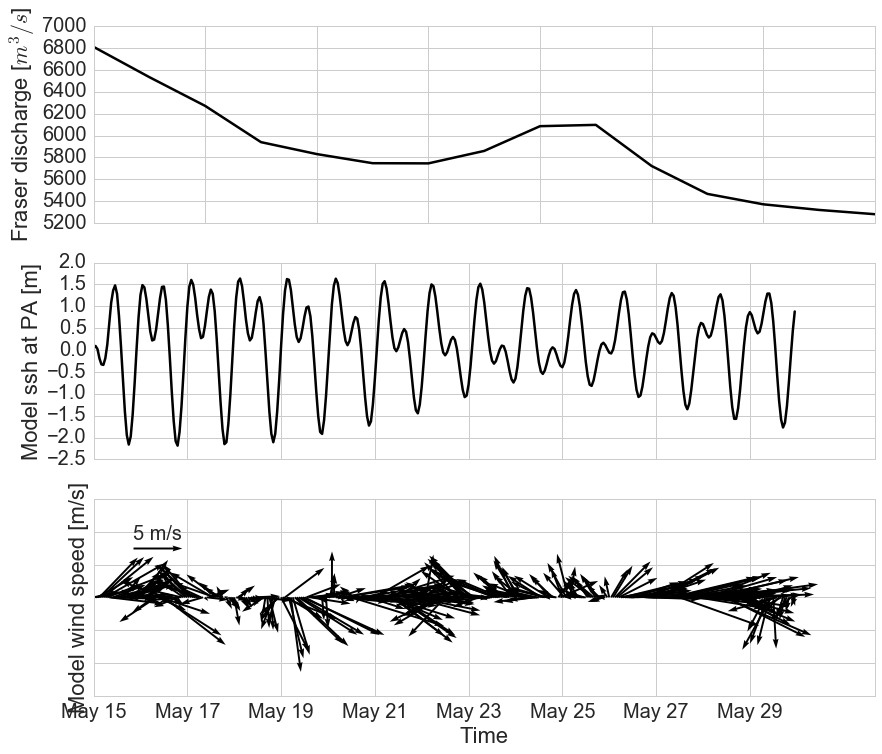

In [29]:
fig, axs = plt.subplots(3,1, figsize = (14,12))
ax = axs[0]
ax.plot(RUNOFFS_june[14:29],color = 'k')
ax.set_ylabel('Fraser discharge [$m^3/s$]')
ax.set_xticks([0, 2,4,6,8,10, 12,14])
plt.setp(ax.get_xticklabels(), visible=False)
ax = axs[1]
ax.plot(ssh['june'],color = 'k')
ax.set_xticks([0, 2*24, 4*24,6*24,8*24,10*24,12*24,14*24])
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Model ssh at PA [m]')
ax =axs[2]
quiver = ax.quiver(u_jun[:,24*14:24*29],v_may[:,24*14:24*29],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')
ax.text(20,0.035,'5 m/s', fontsize = 20)
ax.set_ylabel('Model wind speed [m/s]')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xticks([0, 2*24, 4*24,6*24,8*24,10*24,12*24,14*24])
ax.set_xticklabels(['May 15', 'May 17','May 19','May 21','May 23','May 25','May 27','May 29'])
ax.set_xlabel('Time')